# Principle Component Analysis

In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Use this file path for pc
filepath = r"D:\gradschool\Capstone"
#Use this file path for mac 
#filepath = r"/Users/jacksonjoyner/Desktop/MSBA/Capstone/UseThisData/"
os.chdir(filepath)

In [23]:
playerdf = pd.read_csv("nonullimpactv2.csv")
playerdf

,playername,position,teamname,kills,deaths,assists,doublekills,firstbloodkill,firstbloodassist,firstbloodvictim,...,impactscore,KDA,KP,D%,earnedgoldshare,damageshare,cspm,damagetakenperminute,earnedgold,earnedgpm
0,Cruzer,top,Dignitas,2,2,7,0,0,0,1,...,20.64,4.500000,0.529412,0.181818,0.206422,0.183627,7.9602,837.7960,10465,271.3483
1,Crumbz,jng,Dignitas,0,3,10,0,0,0,0,...,14.76,3.333333,0.588235,0.272727,0.161569,0.082062,3.5782,666.8453,8191,212.3855
2,scarra,mid,Dignitas,3,2,8,0,0,0,0,...,26.22,5.500000,0.647059,0.181818,0.230584,0.392236,9.3604,277.1046,11690,303.1115
3,Imaqtpie,bot,Dignitas,9,1,6,2,0,0,0,...,41.66,15.000000,0.882353,0.090909,0.264175,0.238274,8.6344,393.0337,13393,347.2688
4,KiWiKiD,sup,Dignitas,3,3,9,0,0,0,0,...,20.16,4.000000,0.705882,0.272727,0.137249,0.103801,0.8557,213.7338,6958,180.4149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391557,Rock,top,Hong Kong Attitude,6,4,3,1,0,1,0,...,23.98,2.250000,0.900000,0.153846,0.273646,0.329602,8.0273,1232.1680,8993,263.4668
391558,Patience,jng,Hong Kong Attitude,0,7,2,0,0,1,0,...,-0.66,0.285714,0.200000,0.269231,0.138549,0.128556,4.8926,908.9355,4553,133.3887
391559,B1ven,mid,Hong Kong Attitude,1,4,4,0,0,0,0,...,11.36,1.250000,0.500000,0.153846,0.253016,0.274324,9.3164,501.3867,8315,243.6035
391560,MnM,bot,Hong Kong Attitude,2,4,4,0,0,0,0,...,14.28,1.500000,0.600000,0.153846,0.252834,0.173123,9.1992,505.2832,8309,243.4277


Part of PCA is standardizing your data. The section below will standardize the data we are going to use.

Lets look at a pairs plot of our data for each pca we will be performing

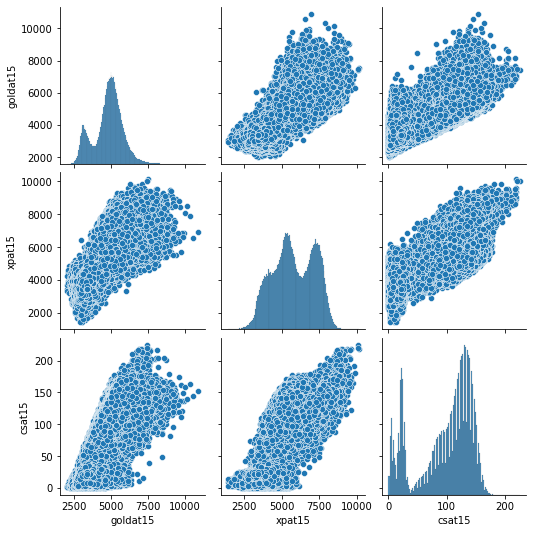

In [4]:
sns.pairplot(data = playerdf, vars=['goldat15','xpat15','csat15'])

In [24]:
features15 = ['goldat15','xpat15','csat15']
x = playerdf.loc[:,features15].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)

Now that the data is standardized, we can perform a PCA on that data.

In [25]:
from sklearn.decomposition import PCA
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCA15"] = principalComponents
pca.explained_variance_ratio_


array([0.85050848])

We can attribute 85% of the variance in the three values with this priniciple component. 

Now lets try and work out another principle component, Gold and Damage Share

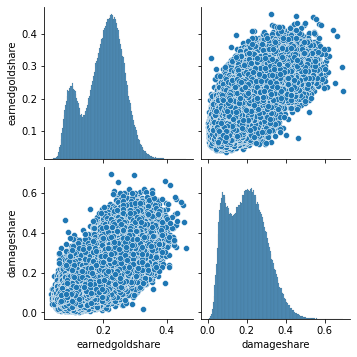

In [26]:
sns.pairplot(data = playerdf, vars=['earnedgoldshare','damageshare'])

In [27]:
featureshare= ["earnedgoldshare",'damageshare']
x = playerdf.loc[:,featureshare].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCAShare"] = principalComponents
pca.explained_variance_ratio_

array([0.89599219])

This PCAShare accounts to 89.6% of the variance between the two variables. 
Now lets look at the per minute variables

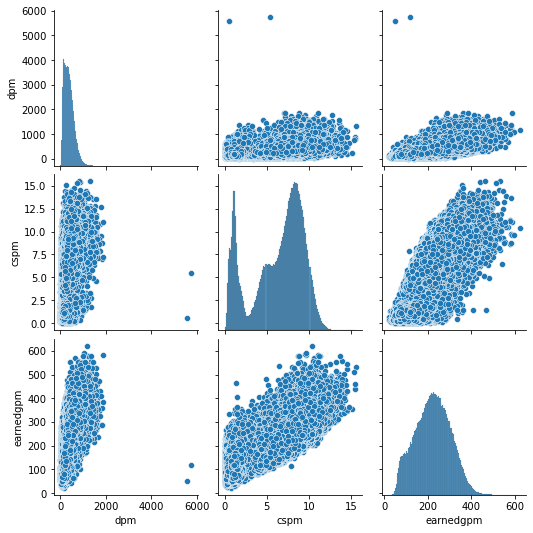

In [10]:
sns.pairplot(data = playerdf,vars = ['dpm','cspm','earnedgpm'])

In [28]:
featureshare= ['earnedgpm','cspm']
x = playerdf.loc[:,featureshare].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCApm"] = principalComponents
pca.explained_variance_ratio_

array([0.91234976])

It turns out, removing dpm from the PCA increases the accuracy by 10 percent. from 81.88 to 91.23

In [30]:
#Im making a csv to test the Logit Model with the new PC's
playerdf.to_csv("PCATest1.csv", index=False)

In the logistic regression, we are indicated to strong colinearity with total_cs, so lets standardize kills, deaths, asssists, and total_cs

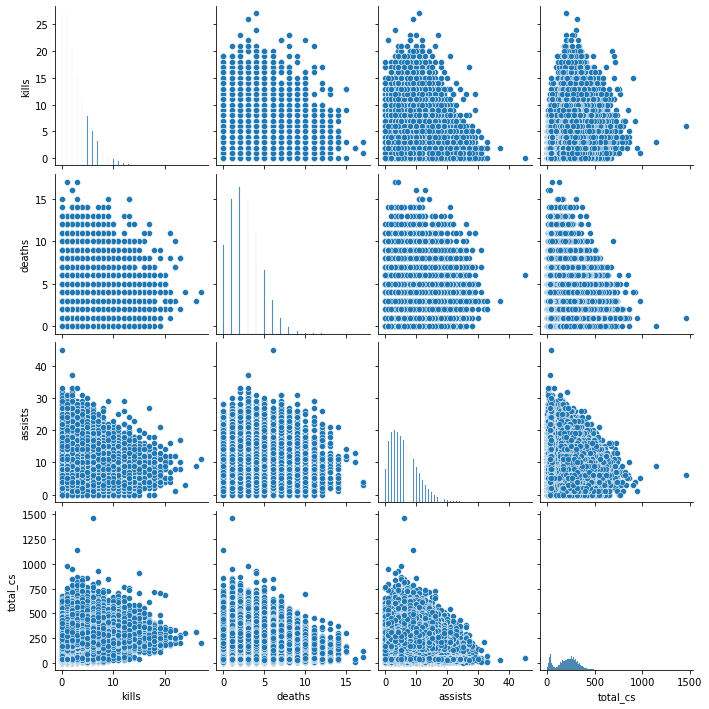

In [31]:
sns.pairplot(data = playerdf,vars = ['kills','deaths','assists','total_cs'])

In [32]:
featureshare= ['kills','deaths','assists','total_cs']
x = playerdf.loc[:,featureshare].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCATotals"] = principalComponents
pca.explained_variance_ratio_

array([0.36906123])

This does not seem to work well. We get 36.91% of the variance explained with this. Not a good measurement